Existe un proyecto gubernamental para construir una nueva variante en relación con la congestión de una autopista interestatal. Sin embargo, antes de planificar el nuevo proyecto, los ingenieros quieren analizar en detalle el tráfico en dirección oeste en la autopista. El objetivo es determinar los indicadores de tráfico pesado en la autopista, para que se pueda considerar para la nueva. Estos indicadores pueden ser el tipo de clima, la hora del día, la hora de la semana, etc.


Variable: holiday
Role: Feature
Type: Categorical
Desc: US National holidays plus regional holiday, Minnesota State Fair
Unit:

Variable: temp
Role: Feature
Type: Continuous
Desc: Average temp in kelvin
Unit: Kelvin

Variable: rain_1h
Role: Feature
Type: Continuous
Desc: Amount in mm of rain that occurred in the hour
Unit: mm

Variable: snow_1h
Role: Feature
Type: Continuous
Desc: Amount in mm of snow that occurred in the hour
Unit: mm

Variable: clouds_all
Role: Feature
Type: Integer
Desc: Percentage of cloud cover
Unit: %

Variable: weather_main
Role: Feature
Type: Categorical
Desc: Short textual description of the current weather
Unit:

Variable: weather_description
Role: Feature
Type: Categorical
Desc: Longer textual description of the current weather
Unit:

Variable: date_time
Role: Feature
Type: Date
Desc: Hour of the data collected in local CST time
Unit:

Variable: traffic_volume
Role: Target
Type: Integer
Desc: Hourly I-94 ATR 301 reported westbound traffic volume
Unit:







CARGA DE LIBRERIAS

In [ ]:
#LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CARGA DE ARCHIVO

In [ ]:
#cargamos el archivo
archivo = '/content/drive/MyDrive/IFTS/UNIDAD 2 TP/Metro_Interstate_Traffic_Volume.csv' #ingresamos la ruta del archivo
df = pd.read_csv(archivo) #definimos el data frame

VISUALIZACION PRELIMINAR DE ARCHIVO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              59 non-null     object 
 1   temp                 47251 non-null  float64
 2   rain_1h              47257 non-null  float64
 3   snow_1h              47246 non-null  float64
 4   clouds_all           47257 non-null  float64
 5   weather_main         47254 non-null  object 
 6   weather_description  47246 non-null  object 
 7   date_time            47257 non-null  object 
 8   traffic_volume       47254 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.3+ MB


In [ ]:
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40.0,Clouds,scattered clouds,10/2/12 9:00,5545.0
1,NaN,289.36,0.0,0.0,75.0,Clouds,broken clouds,10/2/12 10:00,4516.0
2,NaN,289.58,0.0,0.0,90.0,Clouds,overcast clouds,10/2/12 11:00,4767.0
3,NaN,290.13,0.0,0.0,90.0,Clouds,overcast clouds,10/2/12 12:00,5026.0
4,NaN,291.14,0.0,0.0,75.0,Clouds,broken clouds,10/2/12 13:00,4918.0


NOTAS DE VARIABLES

In [ ]:
#Holiday              = tiene los feriados NaN para los dias habiles.         nulls = 48145
#Temp                 = esta en Kelvin (tendriamos que pasarla a Celcius)     nulls = 953
#rain                 = lo que llovio en esa hora                             nulls = 947
#snow                 = lo que nevo en esa hora                               nulls = 958
#clouds_all           = % de nubosidad                                        nulls = 947
#Weather_main         = son los estados del clime (revisar #nan)              nulls = 950
#weather_description  = descripcion detallada del anterior                    nulls = 958
#date_time            = fecha y hora dd/m/aa h:mm (formato)                   nulls = 947
#traffic_volume        = cantidad de autos.                                   nulls = 950

In [ ]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', nan, 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
df.isnull().sum()

,0
holiday,48145
temp,953
rain_1h,947
snow_1h,958
clouds_all,947
weather_main,950
weather_description,958
date_time,947
traffic_volume,950


TRATAMIENTO DE LOS DATOS

In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,4.725100e+04,47257.000000,47246.000000,47257.000000,47254.000000
mean,2.542557e+03,0.469702,0.002513,68.155215,3258.565497
std,4.511085e+05,50.680464,0.143650,4081.818346,1987.454472
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.720100e+02,0.000000,0.000000,1.000000,1190.000000
50%,2.820100e+02,0.000000,0.000000,64.000000,3374.500000
75%,2.917300e+02,0.000000,0.000000,90.000000,4934.000000
max,9.762323e+07,9831.300000,9.000000,887336.000000,7280.000000


PRIMERO SEPARAMOS LA BASE EN LA PORCION QUE NOS INTERESA, COMO NOS PIDEN LOS INDICADORES DE TRANSITO PESADO NOS CONCENTRAMOS EN EL ULTIMO CUARTIL.

In [ ]:
df_ejercicio = df[df['traffic_volume'] > 4900]

In [ ]:
df_ejercicio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12185 entries, 0 to 47256
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              0 non-null      object 
 1   temp                 12183 non-null  float64
 2   rain_1h              12185 non-null  float64
 3   snow_1h              12184 non-null  float64
 4   clouds_all           12185 non-null  float64
 5   weather_main         12185 non-null  object 
 6   weather_description  12183 non-null  object 
 7   date_time            12185 non-null  object 
 8   traffic_volume       12185 non-null  float64
dtypes: float64(5), object(4)
memory usage: 952.0+ KB


AHORA LIMPIAMOS LA BBDD

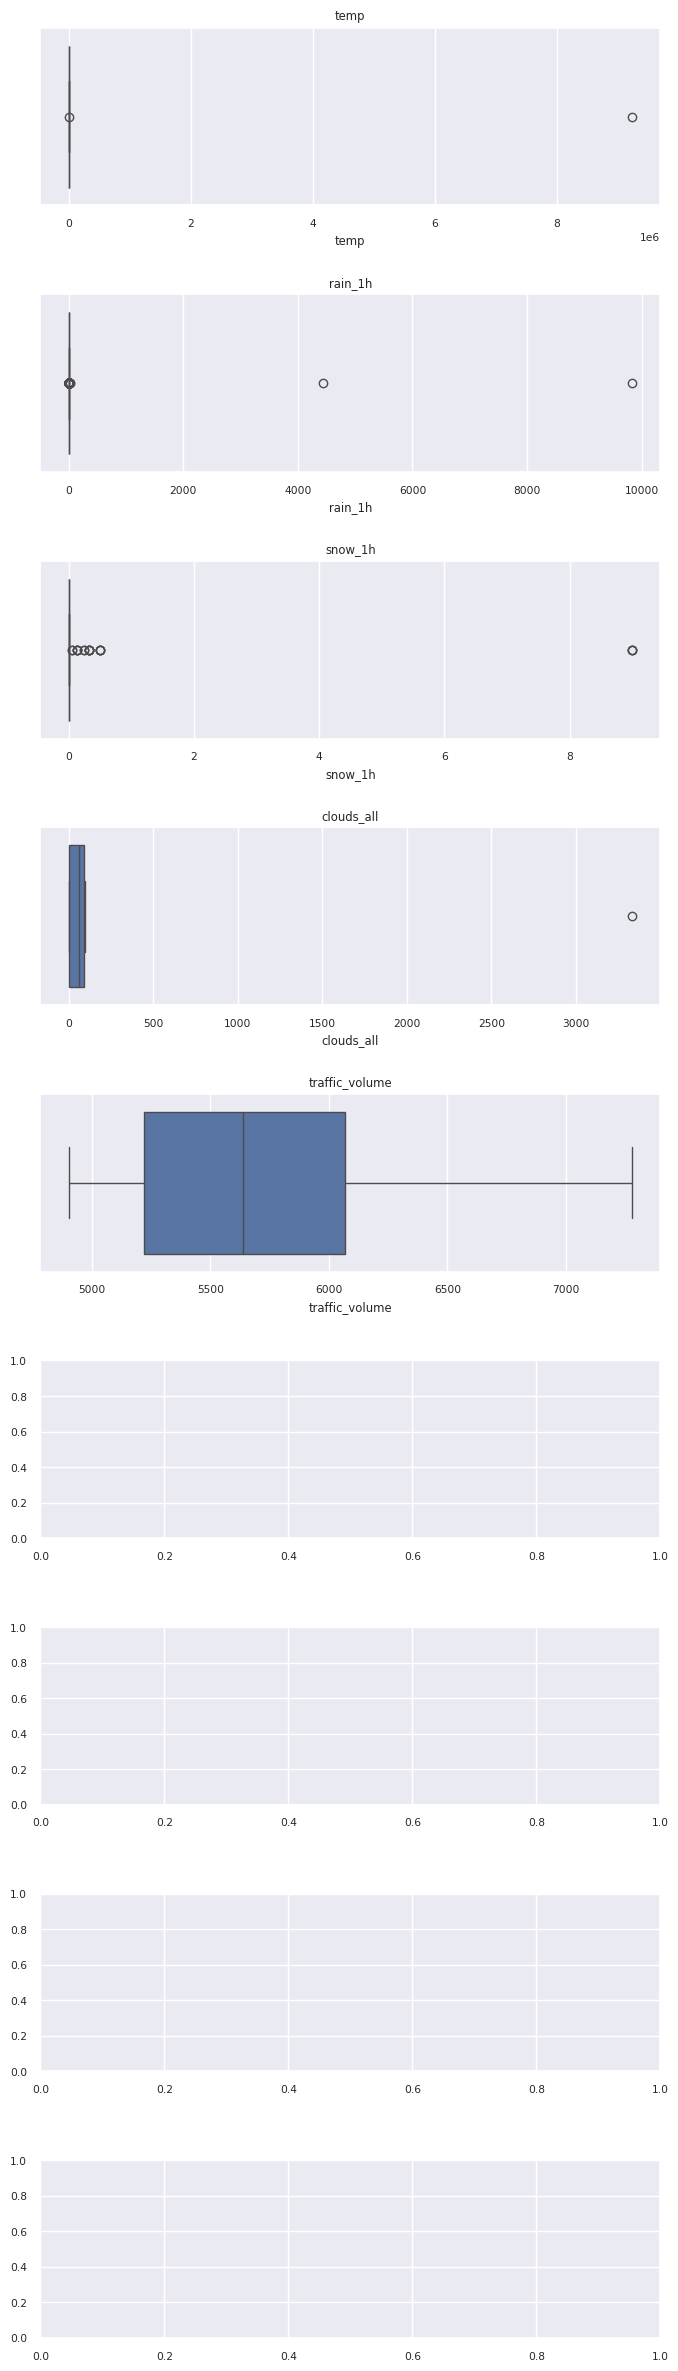

In [ ]:
# Ejecutamos la grafica de boxplot para identificar los outliers.

cols_num = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']



fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8,30))

fig.subplots_adjust(hspace=0.5)



for i, col in enumerate(cols_num):

    sns.boxplot(x=col, data=df_ejercicio, ax=ax[i])

    ax[i].set_title(col)

TOMA DE DECISIONES RESPECTO DE LAS VARIABLES
Nuestro target es el trafico (no tiene outlyers)
Temp tiene outlyers irreales, se considera reemplazarlos por el avg de temperatura.

1) PASAMOS TEMP A CELCIUS

In [ ]:
df_ejercicio.loc[:, 'temp'] = df_ejercicio['temp'] - 273.15

In [ ]:
df_ejercicio.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,15.13,0.0,0.0,40.0,Clouds,scattered clouds,10/2/12 9:00,5545.0
3,NaN,16.98,0.0,0.0,90.0,Clouds,overcast clouds,10/2/12 12:00,5026.0
4,NaN,17.99,0.0,0.0,75.0,Clouds,broken clouds,10/2/12 13:00,4918.0
5,NaN,18.57,0.0,0.0,1.0,Clear,sky is clear,10/2/12 14:00,5181.0
6,NaN,20.02,0.0,0.0,1.0,Clear,sky is clear,10/2/12 15:00,5584.0
7,NaN,20.71,0.0,0.0,1.0,Clear,sky is clear,10/2/12 16:00,6015.0
8,NaN,20.99,0.0,0.0,20.0,Clouds,few clouds,10/2/12 17:00,5791.0
21,NaN,5.08,0.0,0.0,1.0,Clear,sky is clear,10/3/12 6:00,5673.0
22,NaN,4.97,0.0,0.0,1.0,Clear,sky is clear,10/3/12 8:00,6511.0
23,NaN,9.33,0.0,0.0,1.0,Clear,sky is clear,10/3/12 9:00,5471.0


In [ ]:
df_ejercicio.sort_values(by='temp', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
339,NaN,9237099.85,0.0,0.0,75.0,Clouds,broken clouds,10/16/12 14:00,5430.0
45424,NaN,36.14,0.0,0.0,40.0,Clouds,scattered clouds,6/29/18 16:00,5902.0
45425,NaN,35.93,0.0,0.0,40.0,Clouds,scattered clouds,6/29/18 17:00,5314.0
45423,NaN,35.28,0.0,0.0,1.0,Clear,sky is clear,6/29/18 15:00,5903.0
6045,NaN,35.09,0.0,0.0,20.0,Clouds,few clouds,5/15/13 17:00,5982.0
...,...,...,...,...,...,...,...,...,...
12553,NaN,-26.00,0.0,0.0,1.0,Clear,sky is clear,2/27/14 7:00,5684.0
11830,NaN,-26.76,0.0,0.0,1.0,Clear,sky is clear,1/28/14 7:00,5071.0
11901,NaN,-273.15,0.0,0.0,0.0,Clear,sky is clear,1/31/14 6:00,5150.0
177,NaN,NaN,0.0,0.0,92.0,Clear,sky is clear,10/10/12 6:00,5875.0


Se define borrar los 4 registros conflictivos (339, 11901, 177, 178)
Pensamiento:
      Se busca la temperatura en las columnas ordenando de mayor a menor.
      Se observa como temperatura maxima una temperatura irreal, y com minimas, lo mismo, se suman 2 registros cno NaN, por lo que se resuelve quitar los 4 registros.

In [ ]:
df_ejercicio = df_ejercicio.drop([339, 11901, 177, 178])

Verificamos

In [ ]:
df_ejercicio.sort_values(by='temp', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
45424,NaN,36.14,0.0,0.0,40.0,Clouds,scattered clouds,6/29/18 16:00,5902.0
45425,NaN,35.93,0.0,0.0,40.0,Clouds,scattered clouds,6/29/18 17:00,5314.0
45423,NaN,35.28,0.0,0.0,1.0,Clear,sky is clear,6/29/18 15:00,5903.0
6045,NaN,35.09,0.0,0.0,20.0,Clouds,few clouds,5/15/13 17:00,5982.0
45422,NaN,34.54,0.0,0.0,1.0,Clear,sky is clear,6/29/18 14:00,5319.0
...,...,...,...,...,...,...,...,...,...
12166,NaN,-25.15,0.0,0.0,1.0,Clear,sky is clear,2/11/14 7:00,6080.0
11160,NaN,-25.51,0.0,0.0,1.0,Clear,sky is clear,1/2/14 7:00,5654.0
11307,NaN,-25.51,0.0,0.0,1.0,Clear,sky is clear,1/8/14 8:00,5332.0
12553,NaN,-26.00,0.0,0.0,1.0,Clear,sky is clear,2/27/14 7:00,5684.0


Damos por finalizado la limpieza en base a la temperatura.

COMENZAMOS LA VERIFICACION DE LLUVIA

In [ ]:
df_ejercicio.sort_values(by='rain_1h', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24872,NaN,28.96,9831.30,0.0,75.0,Rain,very heavy rain,7/11/16 17:00,5535.0
228,NaN,7.80,4444.00,0.0,40.0,Clouds,scattered clouds,10/12/12 12:00,5526.0
25779,NaN,24.56,31.75,0.0,0.0,Rain,very heavy rain,8/16/16 17:00,4913.0
14853,NaN,25.06,18.03,0.0,0.0,Rain,very heavy rain,6/2/14 16:00,6443.0
25481,NaN,21.77,16.51,0.0,32.0,Rain,very heavy rain,8/4/16 7:00,5724.0
...,...,...,...,...,...,...,...,...,...
16371,NaN,20.20,0.00,0.0,75.0,Clouds,broken clouds,7/7/15 14:00,4998.0
16372,NaN,20.57,0.00,0.0,40.0,Clouds,scattered clouds,7/7/15 15:00,5439.0
16373,NaN,20.96,0.00,0.0,40.0,Clouds,scattered clouds,7/7/15 16:00,6368.0
16374,NaN,21.32,0.00,0.0,40.0,Clouds,scattered clouds,7/7/15 17:00,6232.0


SE DECIDE BORRAR LA FILA 228 POR INCOHERENTE RESPECTO DE LA FILA
Y SE CORRIJE LA FILA 24872 ASUMIENDO QUE LOS DIGITTOS 98 FUERON ERRONAMENTE INGRESADOS. DEJANDO 31.30 COMO REGISTRO REAL.

In [ ]:
df_ejercicio = df_ejercicio.drop(228)

In [ ]:
df_ejercicio.loc[24872,'rain_1h'] = 31.30

VERIFICAMOS

In [ ]:
df_ejercicio.sort_values(by='rain_1h', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
25779,NaN,24.56,31.75,0.0,0.0,Rain,very heavy rain,8/16/16 17:00,4913.0
24872,NaN,28.96,31.30,0.0,75.0,Rain,very heavy rain,7/11/16 17:00,5535.0
14853,NaN,25.06,18.03,0.0,0.0,Rain,very heavy rain,6/2/14 16:00,6443.0
25481,NaN,21.77,16.51,0.0,32.0,Rain,very heavy rain,8/4/16 7:00,5724.0
7568,NaN,23.11,16.00,0.0,32.0,Rain,heavy intensity rain,7/10/13 8:00,6298.0
...,...,...,...,...,...,...,...,...,...
16363,NaN,10.68,0.00,0.0,1.0,Clear,sky is clear,7/7/15 6:00,5528.0
16364,NaN,12.13,0.00,0.0,1.0,Clear,sky is clear,7/7/15 7:00,5794.0
16365,NaN,12.69,0.00,0.0,1.0,Clear,sky is clear,7/7/15 8:00,5340.0
16371,NaN,20.20,0.00,0.0,75.0,Clouds,broken clouds,7/7/15 14:00,4998.0


ANALIZAMOS LA VARIABLE DE NIEVE

In [ ]:
df_ejercicio.sort_values(by='snow_1h', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
26,NaN,21.16,0.00,9.00,1.0,Clear,sky is clear,10/3/12 14:00,5337.0
27,NaN,22.02,0.00,9.00,1.0,Clear,sky is clear,10/3/12 15:00,5692.0
28,NaN,21.98,0.00,9.00,1.0,Clear,sky is clear,10/3/12 16:00,6137.0
20161,NaN,1.18,0.98,0.51,90.0,Fog,fog,12/23/15 12:00,5167.0
20160,NaN,1.18,0.98,0.51,90.0,Mist,mist,12/23/15 12:00,5167.0
...,...,...,...,...,...,...,...,...,...
15382,NaN,28.25,0.00,0.00,1.0,Haze,haze,7/10/14 16:00,6766.0
15383,NaN,28.44,0.00,0.00,88.0,Clouds,overcast clouds,7/10/14 17:00,6530.0
15384,NaN,27.67,0.00,0.00,88.0,Clouds,overcast clouds,7/10/14 18:00,4960.0
15372,NaN,15.00,0.00,0.00,0.0,Clear,Sky is Clear,7/10/14 6:00,5587.0


DADO QUE LOS 3 OUTLIERS SE GENERAN EN EL MISMO DIA, VERIFICAMOS QUE PASO ESA FECHA.
NOTAMOS QUE LA TEMPERATURA ES DE 20 GRADOS, POR LO QUE SE DEFINE PONER EN 0 EL SNOW.


In [ ]:
df_ejercicio.loc[26:28, 'snow_1h'] = 0

VERIFICAMOS

In [ ]:
df_ejercicio.sort_values(by='snow_1h', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20161,NaN,1.18,0.98,0.51,90.0,Fog,fog,12/23/15 12:00,5167.0
20160,NaN,1.18,0.98,0.51,90.0,Mist,mist,12/23/15 12:00,5167.0
20159,NaN,1.18,0.98,0.51,90.0,Snow,snow,12/23/15 12:00,5167.0
20158,NaN,1.18,0.98,0.51,90.0,Rain,moderate rain,12/23/15 12:00,5167.0
20165,NaN,0.71,0.00,0.32,90.0,Snow,light snow,12/23/15 16:00,5222.0
...,...,...,...,...,...,...,...,...,...
15380,NaN,28.22,0.00,0.00,68.0,Haze,haze,7/10/14 14:00,5734.0
15381,NaN,28.46,0.00,0.00,68.0,Clouds,broken clouds,7/10/14 15:00,5962.0
15382,NaN,28.25,0.00,0.00,1.0,Haze,haze,7/10/14 16:00,6766.0
15359,NaN,25.59,0.00,0.00,24.0,Clouds,few clouds,7/9/14 17:00,6495.0


PARA EL NAN DE SNOW_1H QUERIAMOS VERIFICAR LAS TEMPERATURAS ENTRE 5 Y 8 Y VER EL SNOW CORRESPONDIENTE A ESO, SACAR UN PRMEDIO, Y REEMPLAZARLO EN EL NAN (307)

In [ ]:
filtro_snow = df_ejercicio.loc[(df_ejercicio['temp'] > 5) & (df_ejercicio['temp'] < 8)]

In [ ]:
filtro_snow['snow_1h'].unique()

array([ 0., nan])

In [ ]:
# df_ejercicio['snow_1h'].isnull().sum() #NO HAY NULLS
df_ejercicio['snow_1h'].isna().sum() #HAY 1 NAN

0

CON ESTO VERIFICAMOS QUE SNOW ES 0.
LO REEMPLAZAMOS.

In [ ]:
# df_ejercicio['snow_1h'] = df_ejercicio['snow_1h'].fillna(0.0) #este causa error
df_ejercicio.loc[307,'snow_1h'] = 0.0

VERIFICAMOS

In [ ]:
df_ejercicio.sort_values(by='snow_1h', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20161,NaN,1.18,0.98,0.51,90.0,Fog,fog,12/23/15 12:00,5167.0
20160,NaN,1.18,0.98,0.51,90.0,Mist,mist,12/23/15 12:00,5167.0
20159,NaN,1.18,0.98,0.51,90.0,Snow,snow,12/23/15 12:00,5167.0
20158,NaN,1.18,0.98,0.51,90.0,Rain,moderate rain,12/23/15 12:00,5167.0
20163,NaN,0.59,0.00,0.32,90.0,Mist,mist,12/23/15 14:00,5182.0
...,...,...,...,...,...,...,...,...,...
15379,NaN,27.83,0.00,0.00,44.0,Clouds,scattered clouds,7/10/14 13:00,5319.0
15380,NaN,28.22,0.00,0.00,68.0,Haze,haze,7/10/14 14:00,5734.0
15381,NaN,28.46,0.00,0.00,68.0,Clouds,broken clouds,7/10/14 15:00,5962.0
15382,NaN,28.25,0.00,0.00,1.0,Haze,haze,7/10/14 16:00,6766.0


PASAMOS A CLOUDS.

In [ ]:
df_ejercicio.sort_values(by='clouds_all', ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
156,NaN,4.16,0.00,0.0,3333.0,Clouds,broken clouds,10/9/12 7:00,6449.0
6955,NaN,16.90,3.65,0.0,100.0,Mist,mist,6/13/13 12:00,5126.0
3271,NaN,-23.24,0.00,0.0,100.0,Clouds,overcast clouds,2/1/13 6:00,5110.0
6956,NaN,18.10,1.02,0.0,100.0,Rain,moderate rain,6/13/13 13:00,5357.0
6957,NaN,18.64,0.68,0.0,100.0,Rain,light rain,6/13/13 14:00,5640.0
...,...,...,...,...,...,...,...,...,...
24228,NaN,17.82,0.00,0.0,0.0,Clear,Sky is Clear,6/16/16 10:00,5020.0
24230,NaN,21.60,0.00,0.0,0.0,Clear,Sky is Clear,6/16/16 12:00,5473.0
24231,NaN,22.75,0.00,0.0,0.0,Clear,Sky is Clear,6/16/16 13:00,5710.0
24232,NaN,24.99,0.00,0.0,0.0,Clear,Sky is Clear,6/16/16 14:00,5691.0


TRAEMOS LA COLUMNA FILTRADA "broken clouds"

In [ ]:
df_filtro_clouds = df_ejercicio.loc[df_ejercicio['weather_description'] == 'broken clouds']

In [ ]:
df_filtro_clouds

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
4,NaN,17.99,0.0,0.0,75.0,Clouds,broken clouds,10/2/12 13:00,4918.0
66,NaN,6.87,0.0,0.0,75.0,Clouds,broken clouds,10/5/12 9:00,5403.0
70,NaN,8.28,0.0,0.0,75.0,Clouds,broken clouds,10/5/12 13:00,5967.0
156,NaN,4.16,0.0,0.0,3333.0,Clouds,broken clouds,10/9/12 7:00,6449.0
161,NaN,10.93,0.0,0.0,75.0,Clouds,broken clouds,10/9/12 12:00,5067.0
...,...,...,...,...,...,...,...,...,...
46949,NaN,25.43,0.0,0.0,75.0,Clouds,broken clouds,8/23/18 14:00,5312.0
46950,NaN,25.54,0.0,0.0,75.0,Clouds,broken clouds,8/23/18 15:00,5848.0
46951,NaN,25.82,0.0,0.0,75.0,Clouds,broken clouds,8/23/18 16:00,6586.0
47196,NaN,16.32,0.0,0.0,75.0,Clouds,broken clouds,8/29/18 11:00,4969.0


VERIFICAMOS QUE EL VALOR COORRESPONDIENTE DEBERIA SER 75 POR LO QUE SE PROCEDE A SU REEMPLAZO

In [ ]:
df_ejercicio.loc[156,'clouds_all'] = 75.0

VERIFICAMOS

In [ ]:
df_filtro_clouds = df_ejercicio.loc[df_ejercicio['weather_description'] == 'broken clouds']
df_filtro_clouds

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
4,NaN,17.99,0.0,0.0,75.0,Clouds,broken clouds,10/2/12 13:00,4918.0
66,NaN,6.87,0.0,0.0,75.0,Clouds,broken clouds,10/5/12 9:00,5403.0
70,NaN,8.28,0.0,0.0,75.0,Clouds,broken clouds,10/5/12 13:00,5967.0
156,NaN,4.16,0.0,0.0,75.0,Clouds,broken clouds,10/9/12 7:00,6449.0
161,NaN,10.93,0.0,0.0,75.0,Clouds,broken clouds,10/9/12 12:00,5067.0
...,...,...,...,...,...,...,...,...,...
46949,NaN,25.43,0.0,0.0,75.0,Clouds,broken clouds,8/23/18 14:00,5312.0
46950,NaN,25.54,0.0,0.0,75.0,Clouds,broken clouds,8/23/18 15:00,5848.0
46951,NaN,25.82,0.0,0.0,75.0,Clouds,broken clouds,8/23/18 16:00,6586.0
47196,NaN,16.32,0.0,0.0,75.0,Clouds,broken clouds,8/29/18 11:00,4969.0


HASTA ACA LIMPIAMOS:

TEMPERATURA: Pasamos temp a celcius y borramos 4 registros

LLUVIA : Borramos uno y corregimos otro

NIEVE: Corregimos 4 registros

NUBOSIDAD: Se corrige 1 registro


REPASAMOS OUTLIERS

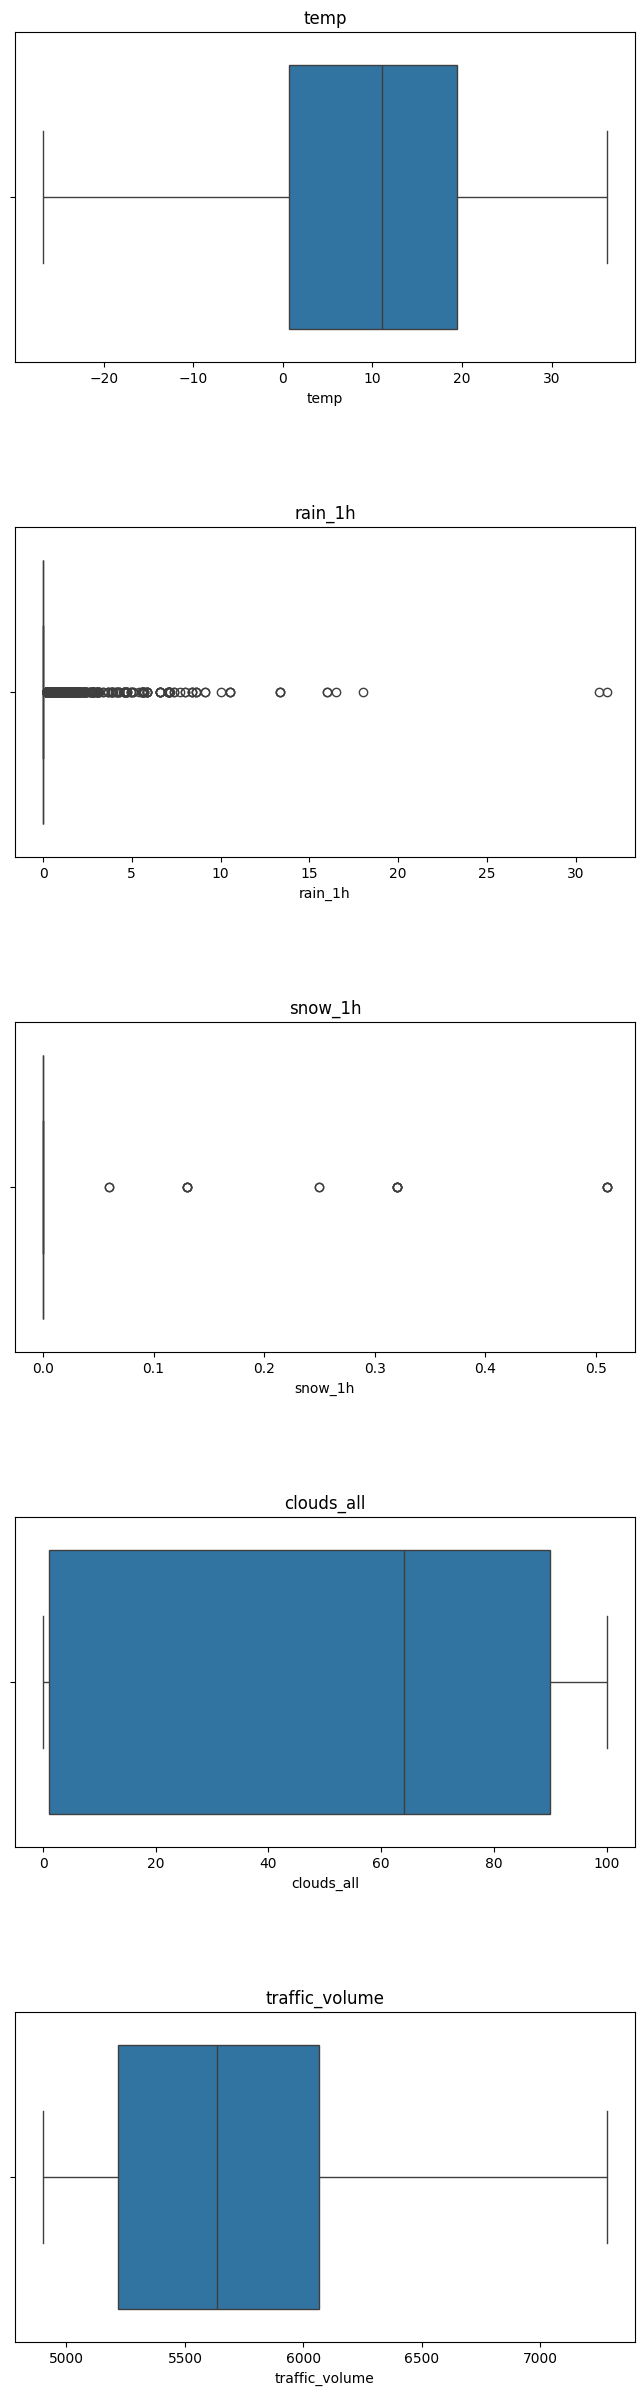

In [ ]:
# Ejecutamos la grafica de boxplot para identificar los outliers.
cols_num = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30)) #son 5 columnas
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(cols_num):

    sns.boxplot(x=col, data=df_ejercicio, ax=ax[i])

    ax[i].set_title(col)

BIS, YA SEPARAMOS LOS DATOS CATEGROICOS Y TIRAMOS EL PAIRPLOT PARA QUE TENER UNA BREVE VISTA DE LAS RELACIONES.

In [ ]:
#Separamos datos categoricos

In [ ]:
df_ejercicio_matriz = df_ejercicio[['temp','rain_1h','snow_1h','clouds_all','traffic_volume']]

<function matplotlib.pyplot.show(close=None, block=None)>

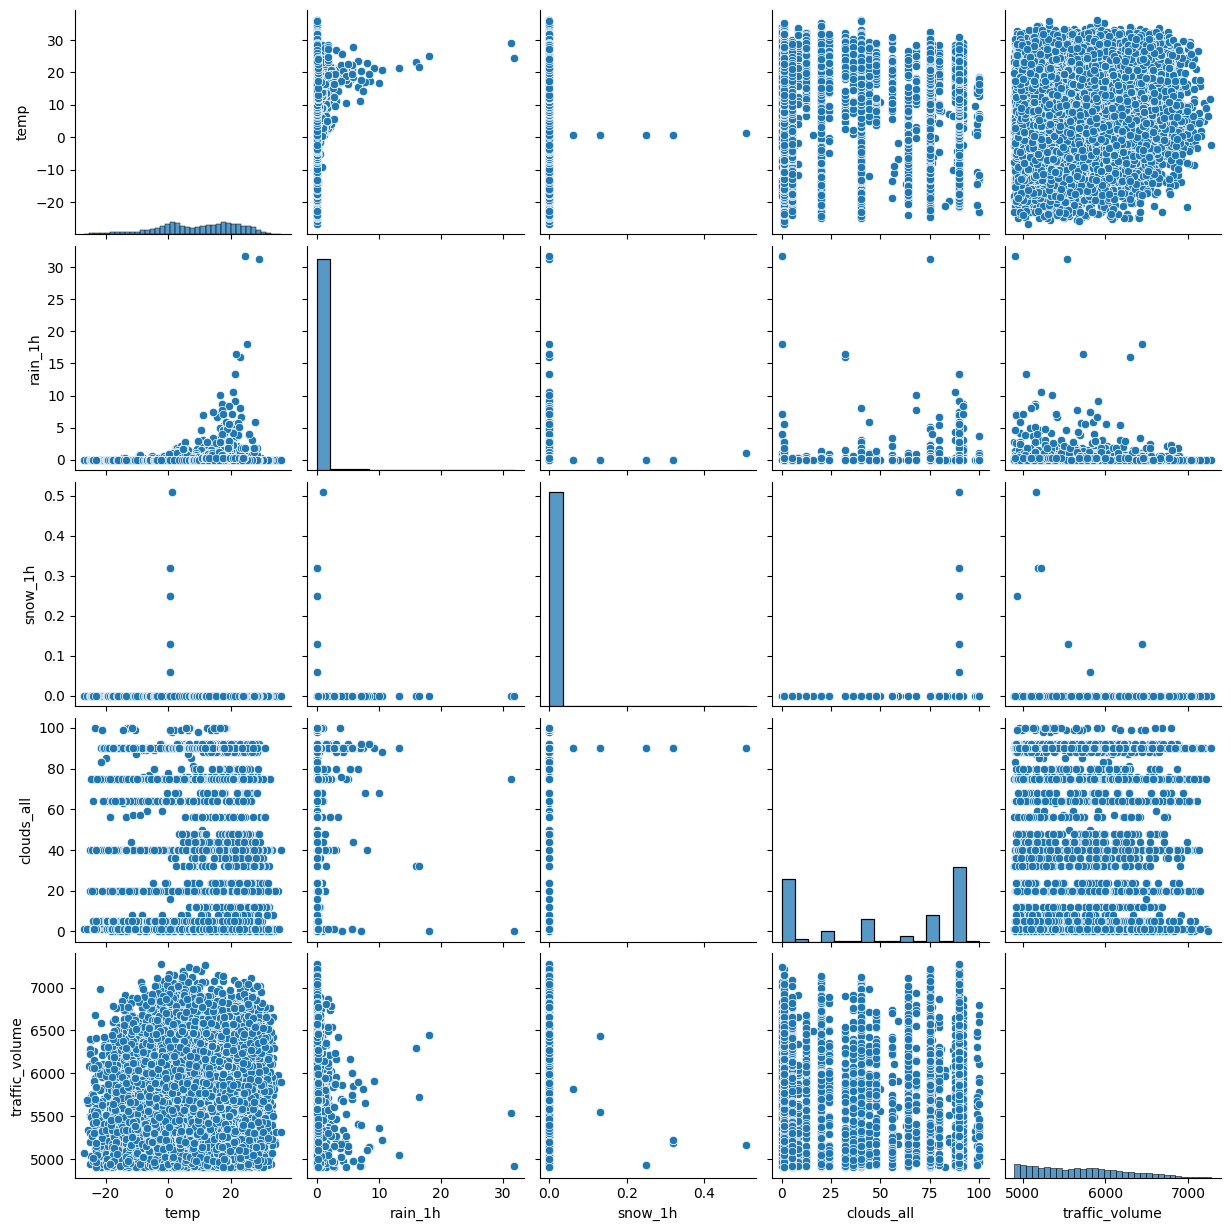

In [ ]:
sns.pairplot(df_ejercicio_matriz, height=2.5)
plt.show

 LIMPIAMOS LA BASE!!!

 FALTA GRAFICO DE CORRELACIONES

sns.pairplot(df_datos, height=2.5)

plt.show


PARA EL 2/9:

VERIFICAR LOS VALORES UNICOS DE LAS VARIABLES TEXTO

CODIFICAR VARIABLES TEXTO. (DARLES NUMEROS)


MATRIZ DE CORRELACIONES.

si estamos aburridos, separar horas de fechas...

AGRUPAR POR VALORES DE 6000 Y 5000 PARA HACER ANALISIS DE FECHA SOBRE ESOS VALORES.

LEER
https://docs.python.org/es/3/library/calendar.html

weekday() <- funcion que trae el dia de la semana entre 0 y 6
0 = lunes
6 = domingo

In [ ]:
from datetime import datetime
days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

d = datetime.strptime("21-2-21", "%d-%m-%y")
print(days[d.weekday()])

2/9 CONTINUACION

VERIFICAR LOS VALORES UNICOS DE LAS VARIABLES TEXTO

CODIFICAR VARIABLES TEXTO. (DARLES NUMEROS)

MATRIZ DE CORRELACIONES.

si estamos aburridos, separar horas de fechas...

AGRUPAR POR VALORES DE 6000 Y 5000 PARA HACER ANALISIS DE FECHA SOBRE ESOS VALORES.

weekday() <- funcion que trae el dia de la semana entre 0 y 6 0 = lunes 6 = domingo

In [ ]:
# VERIFICAR LOS VALORES UNICOS DE LAS VARIABLES TEXTO
print(df_ejercicio['weather_main'].unique(),index)
print(df_ejercicio['weather_description'].unique())

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Thunderstorm' 'Haze' 'Fog'
 'Snow' 'Smoke'] 35
['scattered clouds' 'overcast clouds' 'broken clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' nan 'mist'
 'proximity shower rain' 'moderate rain' 'proximity thunderstorm'
 'thunderstorm with light rain' 'haze' 'fog' 'drizzle'
 'heavy intensity rain' 'heavy snow' 'snow' 'shower snow'
 'light rain and snow' 'light intensity shower rain'
 'thunderstorm with heavy rain' 'thunderstorm with rain'
 'heavy intensity drizzle' 'Sky is Clear' 'thunderstorm'
 'proximity thunderstorm with drizzle' 'light snow' 'very heavy rain'
 'smoke' 'thunderstorm with light drizzle'
 'proximity thunderstorm with rain' 'light shower snow' 'sleet'
 'shower drizzle']


PRIMERO TRABAJAMOS CON WEATHER DESCRIPTION

In [ ]:
#Dropeamos los nan
df_ejercicio = df_ejercicio.dropna(subset=['weather_description'])
print(df_ejercicio)

      holiday   temp  rain_1h  snow_1h  clouds_all weather_main  \
0         NaN  15.13     0.00      0.0        40.0       Clouds   
3         NaN  16.98     0.00      0.0        90.0       Clouds   
4         NaN  17.99     0.00      0.0        75.0       Clouds   
5         NaN  18.57     0.00      0.0         1.0        Clear   
6         NaN  20.02     0.00      0.0         1.0        Clear   
...       ...    ...      ...      ...         ...          ...   
47252     NaN  21.32     0.25      0.0        40.0         Rain   
47253     NaN  22.53     0.25      0.0         1.0         Rain   
47254     NaN  23.71     0.25      0.0        90.0         Rain   
47255     NaN  23.53     0.00      0.0        90.0       Clouds   
47256     NaN  23.97     0.25      0.0        75.0         Rain   

      weather_description      date_time  traffic_volume  
0        scattered clouds   10/2/12 9:00          5545.0  
3         overcast clouds  10/2/12 12:00          5026.0  
4           broken

In [ ]:
# Crear el diccionario con índices como códigos
weather_desc_unique = df_ejercicio['weather_description'].unique()
weather_dict = {desc: index for index, desc in enumerate(weather_desc_unique)}
print(weather_dict)

# Reemplazar los valores de 'weather_description' con sus códigos numéricos
df_ejercicio['weather_description_code'] = df_ejercicio['weather_description'].map(weather_dict)

print(df_ejercicio)

{'scattered clouds': 0, 'overcast clouds': 1, 'broken clouds': 2, 'sky is clear': 3, 'few clouds': 4, 'light rain': 5, 'light intensity drizzle': 6, 'mist': 7, 'proximity shower rain': 8, 'moderate rain': 9, 'proximity thunderstorm': 10, 'thunderstorm with light rain': 11, 'haze': 12, 'fog': 13, 'drizzle': 14, 'heavy intensity rain': 15, 'heavy snow': 16, 'snow': 17, 'shower snow': 18, 'light rain and snow': 19, 'light intensity shower rain': 20, 'thunderstorm with heavy rain': 21, 'thunderstorm with rain': 22, 'heavy intensity drizzle': 23, 'Sky is Clear': 24, 'thunderstorm': 25, 'proximity thunderstorm with drizzle': 26, 'light snow': 27, 'very heavy rain': 28, 'smoke': 29, 'thunderstorm with light drizzle': 30, 'proximity thunderstorm with rain': 31, 'light shower snow': 32, 'sleet': 33, 'shower drizzle': 34}
      holiday   temp  rain_1h  snow_1h  clouds_all weather_main  \
0         NaN  15.13     0.00      0.0        40.0       Clouds   
3         NaN  16.98     0.00      0.0    

MOSTRAMOS EL DICCIONARIO DE WEATHER DICT.

In [ ]:
for i in weather_dict:
    print(weather_dict[i],i)

0 scattered clouds
1 overcast clouds
2 broken clouds
3 sky is clear
4 few clouds
5 light rain
6 light intensity drizzle
7 mist
8 proximity shower rain
9 moderate rain
10 proximity thunderstorm
11 thunderstorm with light rain
12 haze
13 fog
14 drizzle
15 heavy intensity rain
16 heavy snow
17 snow
18 shower snow
19 light rain and snow
20 light intensity shower rain
21 thunderstorm with heavy rain
22 thunderstorm with rain
23 heavy intensity drizzle
24 Sky is Clear
25 thunderstorm
26 proximity thunderstorm with drizzle
27 light snow
28 very heavy rain
29 smoke
30 thunderstorm with light drizzle
31 proximity thunderstorm with rain
32 light shower snow
33 sleet
34 shower drizzle


AHORA TRABAJAMOS CON WEATHER MAIN

In [ ]:
weather_main_unique = df_ejercicio['weather_main'].unique()
weather_main = {desc: index for index, desc in enumerate(weather_main_unique)}
print(weather_main)

# Reemplazar los valores de 'weather_description' con sus códigos numéricos
df_ejercicio['weather_main_code'] = df_ejercicio['weather_main'].map(weather_main)

print(df_ejercicio)

{'Clouds': 0, 'Clear': 1, 'Rain': 2, 'Drizzle': 3, 'Mist': 4, 'Thunderstorm': 5, 'Haze': 6, 'Fog': 7, 'Snow': 8, 'Smoke': 9}
      holiday   temp  rain_1h  snow_1h  clouds_all weather_main  \
0         NaN  15.13     0.00      0.0        40.0       Clouds   
3         NaN  16.98     0.00      0.0        90.0       Clouds   
4         NaN  17.99     0.00      0.0        75.0       Clouds   
5         NaN  18.57     0.00      0.0         1.0        Clear   
6         NaN  20.02     0.00      0.0         1.0        Clear   
...       ...    ...      ...      ...         ...          ...   
47252     NaN  21.32     0.25      0.0        40.0         Rain   
47253     NaN  22.53     0.25      0.0         1.0         Rain   
47254     NaN  23.71     0.25      0.0        90.0         Rain   
47255     NaN  23.53     0.00      0.0        90.0       Clouds   
47256     NaN  23.97     0.25      0.0        75.0         Rain   

      weather_description      date_time  traffic_volume  \
0        s

MOSTRAMOS EL DICCINOARIO DE WEATHER MAIN

In [ ]:
for i in weather_main:
    print(weather_main[i],i)

0 Clouds
1 Clear
2 Rain
3 Drizzle
4 Mist
5 Thunderstorm
6 Haze
7 Fog
8 Snow
9 Smoke


SACAMOS LAS COLUMNAS DE TEXTO Y CONSERVAMOS LAS NUMERICAS (CATEGORICAS)

In [ ]:
df_ejercicio = df_ejercicio.drop(['weather_main','weather_description'], axis=1)

In [ ]:
print(df_ejercicio)

      holiday   temp  rain_1h  snow_1h  clouds_all      date_time  \
0         NaN  15.13     0.00      0.0        40.0   10/2/12 9:00   
3         NaN  16.98     0.00      0.0        90.0  10/2/12 12:00   
4         NaN  17.99     0.00      0.0        75.0  10/2/12 13:00   
5         NaN  18.57     0.00      0.0         1.0  10/2/12 14:00   
6         NaN  20.02     0.00      0.0         1.0  10/2/12 15:00   
...       ...    ...      ...      ...         ...            ...   
47252     NaN  21.32     0.25      0.0        40.0   8/31/18 9:00   
47253     NaN  22.53     0.25      0.0         1.0  8/31/18 10:00   
47254     NaN  23.71     0.25      0.0        90.0  8/31/18 11:00   
47255     NaN  23.53     0.00      0.0        90.0  8/31/18 12:00   
47256     NaN  23.97     0.25      0.0        75.0  8/31/18 13:00   

       traffic_volume  weather_description_code  weather_main_code  
0              5545.0                         0                  0  
3              5026.0            

Dado que todos los valores de la columna "holiday" son "nan" eliminamos la columna

In [ ]:
df_ejercicio = df_ejercicio.drop(['holiday'], axis=1)

In [ ]:
df_ejercicio.head()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weather_description_code,weather_main_code
0,15.13,0.0,0.0,40.0,10/2/12 9:00,5545.0,0,0
3,16.98,0.0,0.0,90.0,10/2/12 12:00,5026.0,1,0
4,17.99,0.0,0.0,75.0,10/2/12 13:00,4918.0,2,0
5,18.57,0.0,0.0,1.0,10/2/12 14:00,5181.0,3,1
6,20.02,0.0,0.0,1.0,10/2/12 15:00,5584.0,3,1


In [ ]:
print(df_ejercicio)

        temp  rain_1h  snow_1h  clouds_all      date_time  traffic_volume  \
0      15.13     0.00      0.0        40.0   10/2/12 9:00          5545.0   
3      16.98     0.00      0.0        90.0  10/2/12 12:00          5026.0   
4      17.99     0.00      0.0        75.0  10/2/12 13:00          4918.0   
5      18.57     0.00      0.0         1.0  10/2/12 14:00          5181.0   
6      20.02     0.00      0.0         1.0  10/2/12 15:00          5584.0   
...      ...      ...      ...         ...            ...             ...   
47252  21.32     0.25      0.0        40.0   8/31/18 9:00          5328.0   
47253  22.53     0.25      0.0         1.0  8/31/18 10:00          5102.0   
47254  23.71     0.25      0.0        90.0  8/31/18 11:00          5359.0   
47255  23.53     0.00      0.0        90.0  8/31/18 12:00          5587.0   
47256  23.97     0.25      0.0        75.0  8/31/18 13:00          5400.0   

       weather_description_code  weather_main_code  
0                     

SEPARAMOS FECHA Y HORA

In [ ]:
#forzamos que la columna 'date_time" sea un datetime
df_ejercicio['date_time'] = pd.to_datetime(df_ejercicio['date_time'])

# Creamos una nueva columna 'date' con solo la fecha
df_ejercicio['date'] = df_ejercicio['date_time'].dt.date

# Creamos una nueva columna 'time' con solo la hora
df_ejercicio['time'] = df_ejercicio['date_time'].dt.time

<ipython-input-261-781abe4ada04>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ejercicio['date_time'] = pd.to_datetime(df_ejercicio['date_time'])


VERIFICAMOS

In [ ]:
print(df_ejercicio)

        temp  rain_1h  snow_1h  clouds_all           date_time  \
0      15.13     0.00      0.0        40.0 2012-10-02 09:00:00   
3      16.98     0.00      0.0        90.0 2012-10-02 12:00:00   
4      17.99     0.00      0.0        75.0 2012-10-02 13:00:00   
5      18.57     0.00      0.0         1.0 2012-10-02 14:00:00   
6      20.02     0.00      0.0         1.0 2012-10-02 15:00:00   
...      ...      ...      ...         ...                 ...   
47252  21.32     0.25      0.0        40.0 2018-08-31 09:00:00   
47253  22.53     0.25      0.0         1.0 2018-08-31 10:00:00   
47254  23.71     0.25      0.0        90.0 2018-08-31 11:00:00   
47255  23.53     0.00      0.0        90.0 2018-08-31 12:00:00   
47256  23.97     0.25      0.0        75.0 2018-08-31 13:00:00   

       traffic_volume  weather_description_code  weather_main_code  \
0              5545.0                         0                  0   
3              5026.0                         1                  0 

Borramos la columna date_time

In [ ]:
df_ejercicio = df_ejercicio.drop(['date_time'], axis=1)

verificamos

In [ ]:
print(df_ejercicio)

        temp  rain_1h  snow_1h  clouds_all  traffic_volume  \
0      15.13     0.00      0.0        40.0          5545.0   
3      16.98     0.00      0.0        90.0          5026.0   
4      17.99     0.00      0.0        75.0          4918.0   
5      18.57     0.00      0.0         1.0          5181.0   
6      20.02     0.00      0.0         1.0          5584.0   
...      ...      ...      ...         ...             ...   
47252  21.32     0.25      0.0        40.0          5328.0   
47253  22.53     0.25      0.0         1.0          5102.0   
47254  23.71     0.25      0.0        90.0          5359.0   
47255  23.53     0.00      0.0        90.0          5587.0   
47256  23.97     0.25      0.0        75.0          5400.0   

       weather_description_code  weather_main_code        date      time  
0                             0                  0  2012-10-02  09:00:00  
3                             1                  0  2012-10-02  12:00:00  
4                             

In [ ]:
df_ejercicio.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,date,time
0,15.13,0.0,0.0,40.0,5545.0,0,0,2012-10-02,09:00:00
3,16.98,0.0,0.0,90.0,5026.0,1,0,2012-10-02,12:00:00
4,17.99,0.0,0.0,75.0,4918.0,2,0,2012-10-02,13:00:00
5,18.57,0.0,0.0,1.0,5181.0,3,1,2012-10-02,14:00:00
6,20.02,0.0,0.0,1.0,5584.0,3,1,2012-10-02,15:00:00


In [ ]:
# Convertir los valores de la columna 'time' a números enteros (hora en formato 24 horas)
df_ejercicio['time_int'] = df_ejercicio['time'].apply(lambda x: x.hour)

# Mostrar los resultados
print(df_ejercicio[['time', 'time_int']])

           time  time_int
0      09:00:00         9
3      12:00:00        12
4      13:00:00        13
5      14:00:00        14
6      15:00:00        15
...         ...       ...
47252  09:00:00         9
47253  10:00:00        10
47254  11:00:00        11
47255  12:00:00        12
47256  13:00:00        13

[12178 rows x 2 columns]


In [ ]:
#Dropeamos la columna Time y dejamos Time_int
df_ejercicio.drop('time', axis=1, inplace=True)

In [ ]:
unique_dates_count = df_ejercicio['date'].nunique()
print(unique_dates_count)

1395


In [ ]:
df_ejercicio.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,date,time_int
0,15.13,0.0,0.0,40.0,5545.0,0,0,2012-10-02,9
3,16.98,0.0,0.0,90.0,5026.0,1,0,2012-10-02,12
4,17.99,0.0,0.0,75.0,4918.0,2,0,2012-10-02,13
5,18.57,0.0,0.0,1.0,5181.0,3,1,2012-10-02,14
6,20.02,0.0,0.0,1.0,5584.0,3,1,2012-10-02,15


ahora vamos a separar la columna date en distintas columnas, dia, mes, año y nombre el dia, tambien vamos a re-acomodar la columna date

In [ ]:
# Convierte la columna a un objeto datetime si no lo está
df_ejercicio['date'] = pd.to_datetime(df_ejercicio['date'])

# Crea columnas separadas para el día, mes y año
df_ejercicio['dia'] = df_ejercicio['date'].dt.day
df_ejercicio['mes'] = df_ejercicio['date'].dt.month
df_ejercicio['anio'] = df_ejercicio['date'].dt.year
df_ejercicio['dia_de_semana'] = df_ejercicio['date'].dt.day_name()

In [ ]:
df_ejercicio.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,date,time_int,dia,mes,anio,dia_de_semana
0,15.13,0.0,0.0,40.0,5545.0,0,0,2012-10-02,9,2,10,2012,Tuesday
3,16.98,0.0,0.0,90.0,5026.0,1,0,2012-10-02,12,2,10,2012,Tuesday
4,17.99,0.0,0.0,75.0,4918.0,2,0,2012-10-02,13,2,10,2012,Tuesday
5,18.57,0.0,0.0,1.0,5181.0,3,1,2012-10-02,14,2,10,2012,Tuesday
6,20.02,0.0,0.0,1.0,5584.0,3,1,2012-10-02,15,2,10,2012,Tuesday


In [ ]:
# Crear un diccionario que asocia los días de la semana con números
dias_dict = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Usar map() para cambiar los días de la semana a números
df_ejercicio['dia_de_semana_num'] = df_ejercicio['dia_de_semana'].map(dias_dict)

# Mostrar el DataFrame con la nueva columna
print(df_ejercicio[['dia_de_semana', 'dia_de_semana_num']])

      dia_de_semana  dia_de_semana_num
0           Tuesday                  2
3           Tuesday                  2
4           Tuesday                  2
5           Tuesday                  2
6           Tuesday                  2
...             ...                ...
47252        Friday                  5
47253        Friday                  5
47254        Friday                  5
47255        Friday                  5
47256        Friday                  5

[12178 rows x 2 columns]


In [ ]:
df_ejercicio.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,date,time_int,dia,mes,anio,dia_de_semana,dia_de_semana_num
0,15.13,0.0,0.0,40.0,5545.0,0,0,2012-10-02,9,2,10,2012,Tuesday,2
3,16.98,0.0,0.0,90.0,5026.0,1,0,2012-10-02,12,2,10,2012,Tuesday,2
4,17.99,0.0,0.0,75.0,4918.0,2,0,2012-10-02,13,2,10,2012,Tuesday,2
5,18.57,0.0,0.0,1.0,5181.0,3,1,2012-10-02,14,2,10,2012,Tuesday,2
6,20.02,0.0,0.0,1.0,5584.0,3,1,2012-10-02,15,2,10,2012,Tuesday,2


In [ ]:
df_ejercicio['Fecha']=df_ejercicio['date'].dt.strftime('%d-%m-%Y')

In [ ]:
df_ejercicio.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,date,time_int,dia,mes,anio,dia_de_semana,dia_de_semana_num,Fecha
0,15.13,0.0,0.0,40.0,5545.0,0,0,2012-10-02,9,2,10,2012,Tuesday,2,02-10-2012
3,16.98,0.0,0.0,90.0,5026.0,1,0,2012-10-02,12,2,10,2012,Tuesday,2,02-10-2012
4,17.99,0.0,0.0,75.0,4918.0,2,0,2012-10-02,13,2,10,2012,Tuesday,2,02-10-2012
5,18.57,0.0,0.0,1.0,5181.0,3,1,2012-10-02,14,2,10,2012,Tuesday,2,02-10-2012
6,20.02,0.0,0.0,1.0,5584.0,3,1,2012-10-02,15,2,10,2012,Tuesday,2,02-10-2012


In [ ]:
#Dropeamos date
df_ejercicio = df_ejercicio.drop(['date'], axis=1)

In [ ]:
df_ejercicio.anio.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int32)

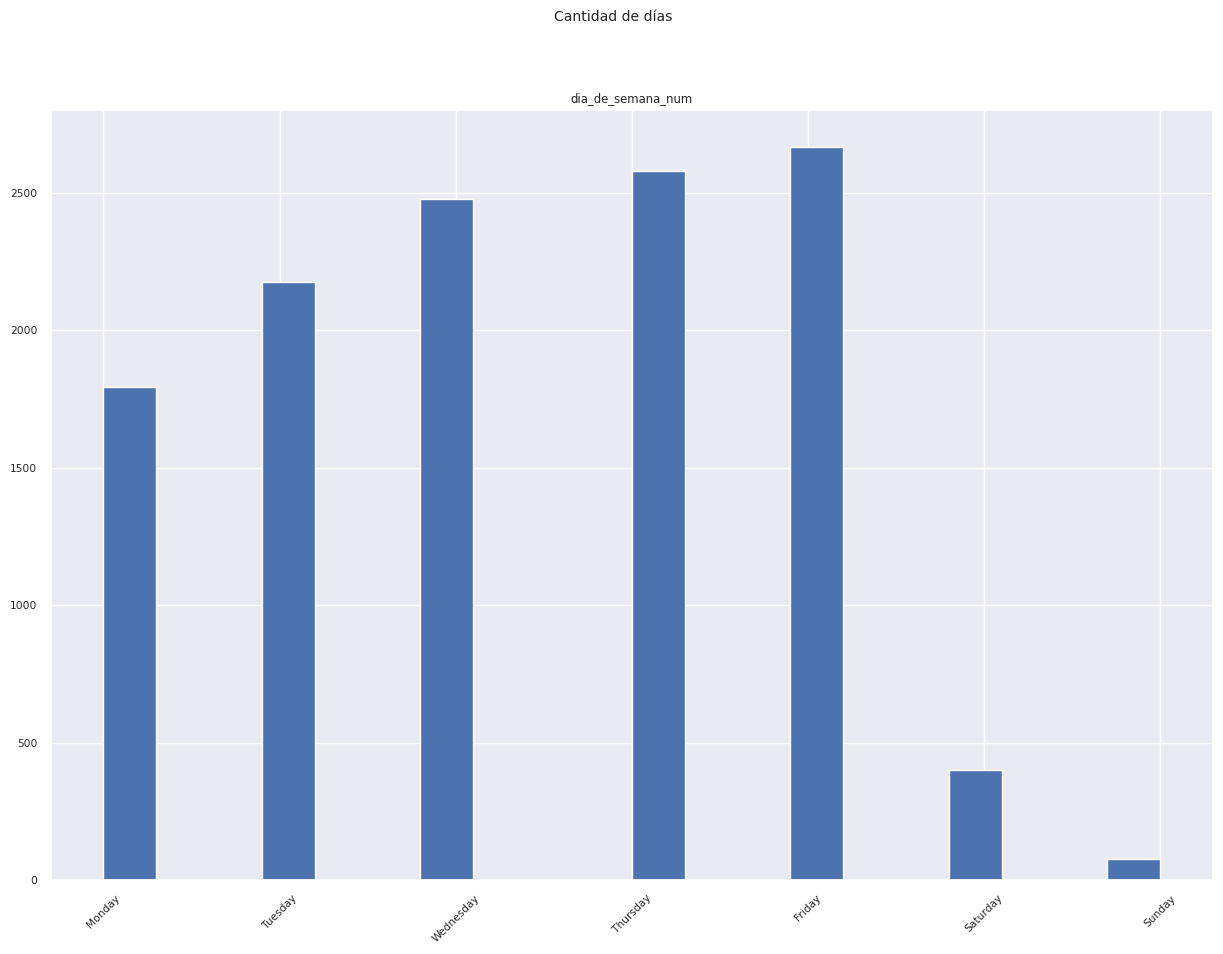

In [ ]:
# Crear el histograma
df_ejercicio[['dia_de_semana_num']].hist(bins=20, figsize=(15, 10))

# Configurar el título
plt.suptitle('Cantidad de días')

# Obtener los nombres únicos de los días de la semana en el orden correcto
dias_semana = df_ejercicio[['dia_de_semana_num', 'dia_de_semana']].drop_duplicates().sort_values('dia_de_semana_num')

# Establecer las etiquetas del eje x con los nombres de los días de la semana
plt.xticks(ticks=dias_semana['dia_de_semana_num'], labels=dias_semana['dia_de_semana'], rotation=45)

# Mostrar el gráfico
plt.show()

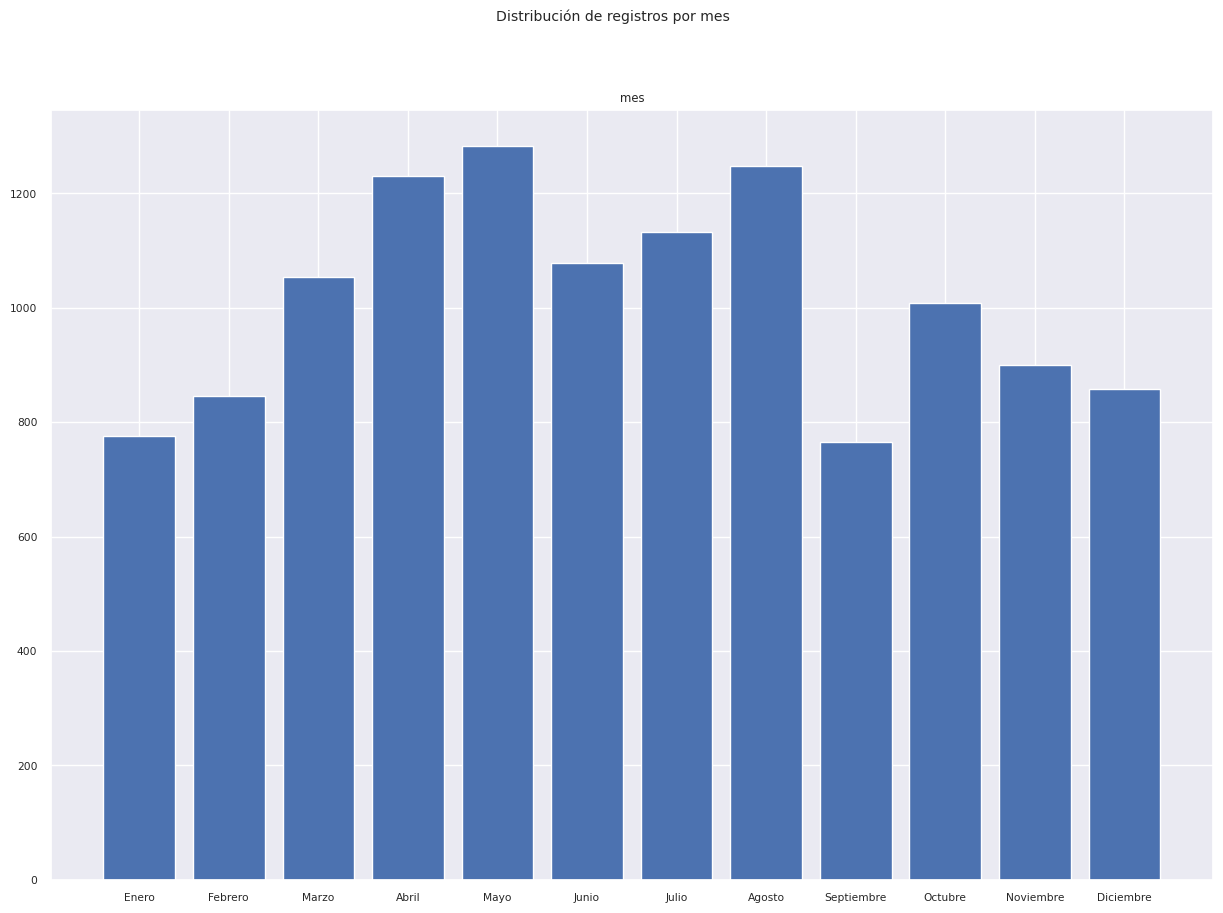

In [ ]:
# Crear el histograma con 12 bins, uno para cada mes
df_ejercicio[['mes']].hist(bins=range(1, 14), figsize=(15, 10), rwidth=0.8)

# Configurar el título
plt.suptitle('Distribución de registros por mes')

# Establecer las etiquetas del eje x como nombres de los meses y ajustarlas para que estén centradas
plt.xticks(ticks=[i + 0.5 for i in range(1, 13)], labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Mostrar el gráfico
plt.show()

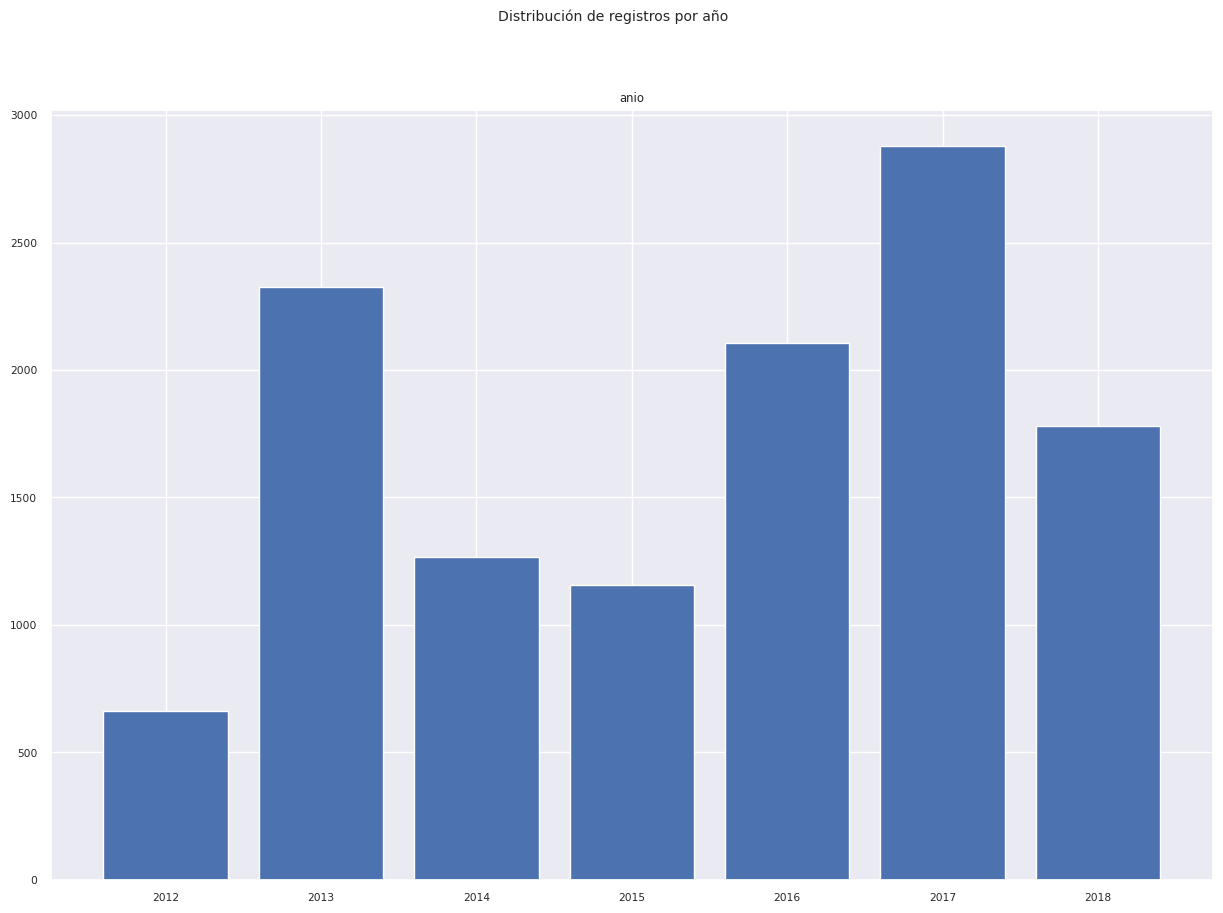

In [ ]:
# Crear el histograma con un bin para cada año
df_ejercicio[['anio']].hist(bins=range(df_ejercicio['anio'].min(), df_ejercicio['anio'].max() + 2), figsize=(15, 10), rwidth=0.8)

# Configurar el título
plt.suptitle('Distribución de registros por año')

# Ajustar las etiquetas del eje x para que estén centradas
plt.xticks(ticks=[i + 0.5 for i in range(df_ejercicio['anio'].min(), df_ejercicio['anio'].max() + 1)],
           labels=range(df_ejercicio['anio'].min(), df_ejercicio['anio'].max() + 1))

# Mostrar el gráfico
plt.show()

VEAMOS NUESTRO DS DE NUEVO

In [ ]:
df_ejercicio.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,time_int,dia,mes,anio,dia_de_semana,dia_de_semana_num,Fecha
0,15.13,0.0,0.0,40.0,5545.0,0,0,9,2,10,2012,Tuesday,2,02-10-2012
3,16.98,0.0,0.0,90.0,5026.0,1,0,12,2,10,2012,Tuesday,2,02-10-2012
4,17.99,0.0,0.0,75.0,4918.0,2,0,13,2,10,2012,Tuesday,2,02-10-2012
5,18.57,0.0,0.0,1.0,5181.0,3,1,14,2,10,2012,Tuesday,2,02-10-2012
6,20.02,0.0,0.0,1.0,5584.0,3,1,15,2,10,2012,Tuesday,2,02-10-2012


In [ ]:
#vamos a hacer un nuevo df para correlacion
df_ejercicio_corr = df_ejercicio.drop(['Fecha','dia_de_semana'], axis=1)
df_ejercicio_corr

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,time_int,dia,mes,anio,dia_de_semana_num
0,15.13,0.00,0.0,40.0,5545.0,0,0,9,2,10,2012,2
3,16.98,0.00,0.0,90.0,5026.0,1,0,12,2,10,2012,2
4,17.99,0.00,0.0,75.0,4918.0,2,0,13,2,10,2012,2
5,18.57,0.00,0.0,1.0,5181.0,3,1,14,2,10,2012,2
6,20.02,0.00,0.0,1.0,5584.0,3,1,15,2,10,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...
47252,21.32,0.25,0.0,40.0,5328.0,5,2,9,31,8,2018,5
47253,22.53,0.25,0.0,1.0,5102.0,5,2,10,31,8,2018,5
47254,23.71,0.25,0.0,90.0,5359.0,5,2,11,31,8,2018,5
47255,23.53,0.00,0.0,90.0,5587.0,1,0,12,31,8,2018,5


Sacamos matriz de correlacion

In [ ]:
df_ejercicio_corr.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_description_code,weather_main_code,time_int,dia,mes,anio,dia_de_semana_num
temp,1.000000,0.084565,-0.023363,-0.123867,0.017404,-0.028051,-0.172064,0.192074,0.079204,0.246912,0.073509,-0.038300
rain_1h,0.084565,1.000000,0.013083,0.070982,-0.038941,0.121395,0.079470,-0.014202,0.011260,0.016102,-0.048242,-0.022126
snow_1h,-0.023363,0.013083,1.000000,0.034093,-0.026007,0.039173,0.053334,0.014497,0.013835,0.029508,-0.003390,0.002156
clouds_all,-0.123867,0.070982,0.034093,1.000000,-0.007099,0.025849,0.212088,0.053515,0.041573,0.016629,-0.055923,-0.014288
traffic_volume,0.017404,-0.038941,-0.026007,-0.007099,1.000000,-0.014937,-0.021595,0.043371,0.001945,-0.037955,-0.043574,-0.144304
weather_description_code,-0.028051,0.121395,0.039173,0.025849,-0.014937,1.000000,0.689109,-0.093773,0.002045,0.044210,-0.004653,-0.032519
weather_main_code,-0.172064,0.079470,0.053334,0.212088,-0.021595,0.689109,1.000000,-0.158042,-0.027458,0.003902,0.049913,-0.038195
time_int,0.192074,-0.014202,0.014497,0.053515,0.043371,-0.093773,-0.158042,1.000000,-0.012082,0.010292,-0.014538,0.059595
dia,0.079204,0.011260,0.013835,0.041573,0.001945,0.002045,-0.027458,-0.012082,1.000000,-0.050058,0.032959,-0.011475
mes,0.246912,0.016102,0.029508,0.016629,-0.037955,0.044210,0.003902,0.010292,-0.050058,1.000000,-0.187326,-0.023497


VEAMOS CON UN HEATMAP

<Axes: >

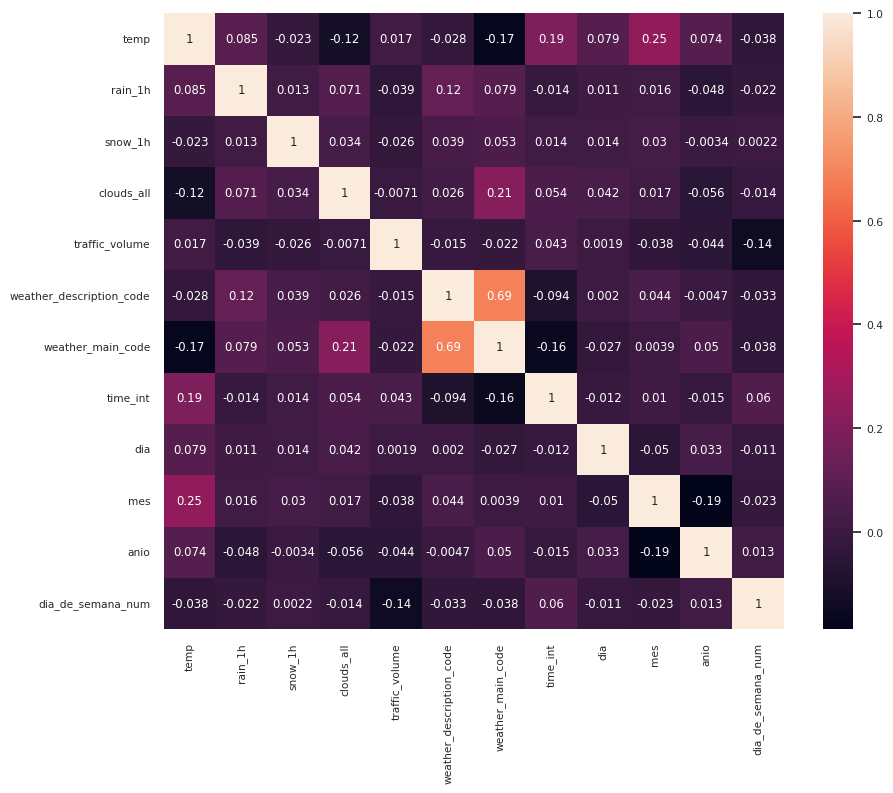

In [ ]:
numeric_cols = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume','weather_description_code','weather_main_code','time_int','dia','mes','anio','dia_de_semana_num']

cm = np.corrcoef(df_ejercicio_corr[numeric_cols].values.T)

sns.set(font_scale=0.7)
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

EN ESTE PUNTO PODEMOS DEFINIR QUE NO SE ENCUENTRA RELACION ROBUSTA.
